In [1]:
## Importing all the libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import zipfile
import shutil
from pathlib import Path
from PIL import Image
import warnings
warnings.filterwarnings("ignore")

## Step 1: Get current working directory automatically

In [3]:
current_dir = os.getcwd()
print("Current Notebook Path:", current_dir)

Current Notebook Path: C:\Users\Taheruddin\Downloads\PRCP-1001-RiceLeaf


## Step 2: Build Data folder path automatically

In [5]:
data_dir = os.path.join(current_dir, "Data")
print("Data Folder Path:", data_dir)

Data Folder Path: C:\Users\Taheruddin\Downloads\PRCP-1001-RiceLeaf\Data


## Step 3: Cleanup previously extracted folders (so we start fresh)

In [7]:
print("Cleaning Data folder (remove old extracted folders)...\n")

for item in os.listdir(data_dir):
    path = os.path.join(data_dir, item)

    # Remove only folders (leave zip files)
    if os.path.isdir(path):
        print("Removing folder:", item)
        shutil.rmtree(path)

print("\nData folder cleaned. Only zip files should remain now (if any).")

Cleaning Data folder (remove old extracted folders)...

Removing folder: Bacterial leaf blight
Removing folder: Brown spot
Removing folder: Leaf smut

Data folder cleaned. Only zip files should remain now (if any).


## Step 4: List contents inside Data Folder

In [9]:
print("Files inside Data folder:")
for item in os.listdir(data_dir):
    print(" -", item)

Files inside Data folder:
 - Bacterial leaf blight-20200814T055237Z-001.zip
 - Brown spot-20200814T055208Z-001.zip
 - Leaf smut-20200814T055530Z-001.zip


## Step 5: Extract all ZIP files inside the Data folder

In [11]:
print("Extracting ZIP files...\n")

for filename in os.listdir(data_dir):
    if filename.lower().endswith(".zip"):                                      
        zip_path = os.path.join(data_dir, filename)                             
        extract_folder = os.path.join(data_dir, filename.replace(".zip", ""))   

        # Create extraction folder if not exists
        if not os.path.exists(extract_folder):
            os.makedirs(extract_folder)

        print(f"Extracting: \{filename} \n -->  {extract_folder}\n")

        with zipfile.ZipFile(zip_path, 'r') as zip_ref:                        
            zip_ref.extractall(extract_folder)                                

print("\nAll ZIP files extracted successfully!")


Extracting ZIP files...

Extracting: \Bacterial leaf blight-20200814T055237Z-001.zip 
 -->  C:\Users\Taheruddin\Downloads\PRCP-1001-RiceLeaf\Data\Bacterial leaf blight-20200814T055237Z-001

Extracting: \Brown spot-20200814T055208Z-001.zip 
 -->  C:\Users\Taheruddin\Downloads\PRCP-1001-RiceLeaf\Data\Brown spot-20200814T055208Z-001

Extracting: \Leaf smut-20200814T055530Z-001.zip 
 -->  C:\Users\Taheruddin\Downloads\PRCP-1001-RiceLeaf\Data\Leaf smut-20200814T055530Z-001


All ZIP files extracted successfully!


## Step 6 — Move images from inner nested folders to clean class folders

In [13]:
print("Fixing folder structure...\n")

# Clean class names
name_map = {
    "Bacterial leaf blight": "Bacterial leaf blight",
    "Brown spot": "Brown spot",
    "Leaf smut": "Leaf smut"
}

image_extensions = (".jpg", ".jpeg", ".png", ".bmp")

# Walk through all extracted folders
for root, dirs, files in os.walk(data_dir):
    folder_name = os.path.basename(root)                                  

    if folder_name in name_map:   # if it's the inner class folder
        final_class_name = name_map[folder_name]
        final_class_dir = os.path.join(data_dir, final_class_name)
        os.makedirs(final_class_dir, exist_ok=True)

        print(f" Moving from: {root}")
        print(f"     --> to:  {final_class_dir}\n")

        for f in files:
            if f.lower().endswith(image_extensions):
                src = os.path.join(root, f)
                dst = os.path.join(final_class_dir, f)
                shutil.move(src, dst)

print("\nImages moved to clean folders.")


Fixing folder structure...

 Moving from: C:\Users\Taheruddin\Downloads\PRCP-1001-RiceLeaf\Data\Bacterial leaf blight-20200814T055237Z-001\Bacterial leaf blight
     --> to:  C:\Users\Taheruddin\Downloads\PRCP-1001-RiceLeaf\Data\Bacterial leaf blight

 Moving from: C:\Users\Taheruddin\Downloads\PRCP-1001-RiceLeaf\Data\Brown spot-20200814T055208Z-001\Brown spot
     --> to:  C:\Users\Taheruddin\Downloads\PRCP-1001-RiceLeaf\Data\Brown spot

 Moving from: C:\Users\Taheruddin\Downloads\PRCP-1001-RiceLeaf\Data\Leaf smut-20200814T055530Z-001\Leaf smut
     --> to:  C:\Users\Taheruddin\Downloads\PRCP-1001-RiceLeaf\Data\Leaf smut


Images moved to clean folders.


## Step 7: Remove empty extracted timestamp folders

In [15]:
print("Cleaning extracted timestamp folders...\n")

for item in os.listdir(data_dir):
    folder_path = os.path.join(data_dir, item)

    if os.path.isdir(folder_path) and "-" in item:
        print("Removing:", folder_path)
        shutil.rmtree(folder_path)

print("\nCleanup complete. Only clean class folders remain.")

Cleaning extracted timestamp folders...

Removing: C:\Users\Taheruddin\Downloads\PRCP-1001-RiceLeaf\Data\Bacterial leaf blight-20200814T055237Z-001
Removing: C:\Users\Taheruddin\Downloads\PRCP-1001-RiceLeaf\Data\Brown spot-20200814T055208Z-001
Removing: C:\Users\Taheruddin\Downloads\PRCP-1001-RiceLeaf\Data\Leaf smut-20200814T055530Z-001

Cleanup complete. Only clean class folders remain.


## Step 8 – Final check

In [17]:
print("FINAL folders inside Data:")
for item in os.listdir(data_dir):
    path = os.path.join(data_dir, item)
    kind = "(folder)" if os.path.isdir(path) else "(file)"
    print(f" - {item} {kind}")

FINAL folders inside Data:
 - Bacterial leaf blight (folder)
 - Bacterial leaf blight-20200814T055237Z-001.zip (file)
 - Brown spot (folder)
 - Brown spot-20200814T055208Z-001.zip (file)
 - Leaf smut (folder)
 - Leaf smut-20200814T055530Z-001.zip (file)


# ----------- EDA ------------

## Count number of images in each cleaned class folder

In [20]:
print("Image count per class:\n")

image_extensions = (".jpg", ".jpeg", ".png", ".bmp")
class_counts = {}                                     # Creates a dictionary which can be used to store img name with key value of image count

for item in os.listdir(data_dir):
    class_path = os.path.join(data_dir, item)

    if os.path.isdir(class_path):
        count = sum(
            1 for f in os.listdir(class_path)
            if f.lower().endswith(image_extensions)
        )
        class_counts[item] = count
        print(f" - {item}: {count} images")


Image count per class:

 - Bacterial leaf blight: 40 images
 - Brown spot: 40 images
 - Leaf smut: 39 images


###  Observation: Missing Image in Leaf Smut Class

The dataset documentation states that each class contains 40 images, for a total of 120 images. However, after extraction and cleaning, the dataset actually contains:

- **Bacterial Leaf Blight:** 40 images  
- **Brown Spot:** 40 images  
- **Leaf Smut:** 39 images  

#### Possible Causes
- The dataset might originally be missing one Leaf Smut image.
- The dataset documentation may include a minor inconsistency.
- The missing file might not have been included in the ZIP archive.

#### Impact on Training
- The class imbalance (40–40–39) is extremely small and does **not** affect the model significantly.
- No class weighting or oversampling is required.

#### Decision
- Proceed with the dataset as-is (40/40/39 images).
- Data augmentation will further help balance representation during training.


## Plot class distribution

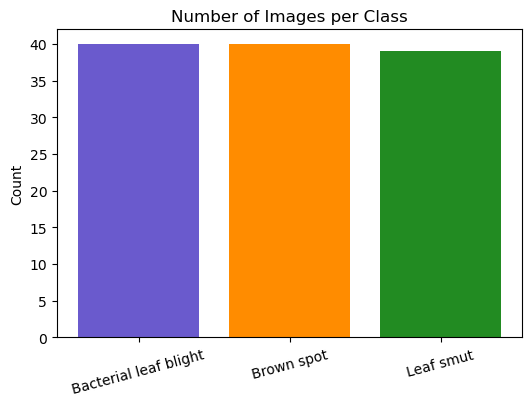

In [23]:
plt.figure(figsize=(6,4))
plt.bar(class_counts.keys(), class_counts.values(), color=['#6a5acd','#ff8c00','#228b22'])
plt.title("Number of Images per Class")
plt.ylabel("Count")
plt.xticks(rotation=15)
plt.show()

- The bar plot confirms near-perfect class balance. All classes have approximately
the same number of samples. This helps prevent bias during model training and
reduces the need for oversampling or class-weight adjustments.

## Show sample images from each class


Showing samples for: Bacterial leaf blight


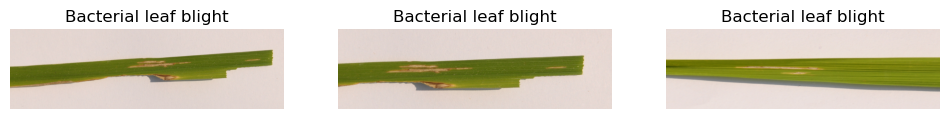


Showing samples for: Brown spot


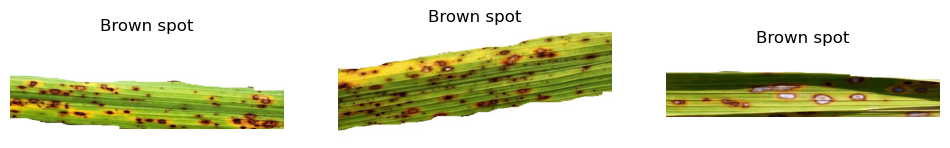


Showing samples for: Leaf smut


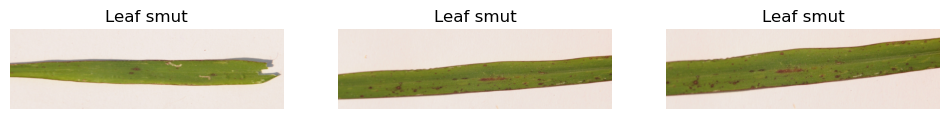

In [26]:
from PIL import Image

samples_to_show = 3

for cls in class_counts.keys():
    class_path = os.path.join(data_dir, cls)
    img_files = [
        f for f in os.listdir(class_path)
        if f.lower().endswith(image_extensions)
    ]

    print(f"\nShowing samples for: {cls}")
    plt.figure(figsize=(12, 4))

    for i in range(samples_to_show):
        img_path = os.path.join(class_path, img_files[i])
        img = Image.open(img_path)

        plt.subplot(1, samples_to_show, i+1)
        plt.imshow(img)
        plt.axis("off")
        plt.title(cls)

    plt.show()

- Visual inspection confirms that the images are correctly labeled and each class
exhibits distinct disease patterns. This helps validate dataset integrity and
gives an early understanding of the visual cues the model must learn.


## Image size analysis

In [29]:
sizes = []

for cls in os.listdir(data_dir):
    class_path = os.path.join(data_dir, cls)
    if os.path.isdir(class_path):
        for img_name in os.listdir(class_path):
            img_path = os.path.join(class_path, img_name)
            img = Image.open(img_path)
            sizes.append(img.size)   # (width, height)

# Convert to numpy array for analysis
sizes = np.array(sizes)

print("Unique image sizes:", np.unique(sizes, axis=0))


Unique image sizes: [[ 250  200]
 [ 286   92]
 [ 296   88]
 [ 301   71]
 [ 311  170]
 [ 316  127]
 [ 340   94]
 [ 359  168]
 [ 367   73]
 [ 376   80]
 [ 427  193]
 [ 456  124]
 [ 467  104]
 [ 503  174]
 [ 510  383]
 [ 537  216]
 [ 562  217]
 [ 565  233]
 [ 614  409]
 [ 617  244]
 [ 699  197]
 [ 741  291]
 [ 763  268]
 [ 765  224]
 [ 766  250]
 [ 768  514]
 [ 946  255]
 [ 948  211]
 [ 948  233]
 [1200  900]
 [1480  279]
 [1504  323]
 [1530  371]
 [3081  897]]


#### Image size analysis - Interpretation
The rice leaf dataset contains images with high variability in resolution and aspect ratio.
The smallest image is around 301×71 px, while the largest image is around 3081×897 px.
This indicates that the dataset was collected from diverse sources and is not standardized.

#### Implications for Modeling

    - Deep learning models (CNNs) require fixed-size images as input.

    - Due to inconsistent dimensions, resizing will be mandatory during preprocessing.

    - The wide variety of aspect ratios means resizing may introduce slight distortion, but this will be handled with data augmentation (rotation, zoom, shift).

#### Decision for Preprocessing

    - Before feeding the data into a neural network:

    - All images will be resized to a fixed resolution (e.g., 224×224 or 256×256)

    - All images will be normalized (pixel values scaled 0–1)

    - Random augmentations will be applied to help the model generalize

## Width and Height Distribution

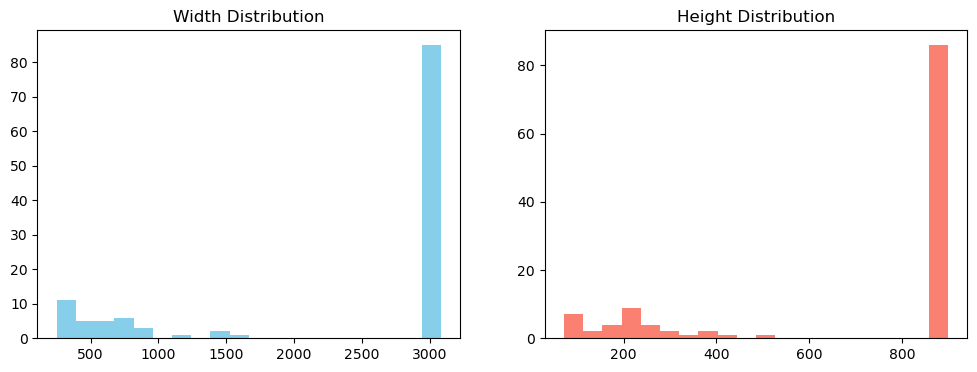

In [32]:
widths = sizes[:,0]
heights = sizes[:,1]

plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.hist(widths, bins=20, color='skyblue')
plt.title("Width Distribution")

plt.subplot(1,2,2)
plt.hist(heights, bins=20, color='salmon')
plt.title("Height Distribution")

plt.show()

#### Width and Height Distribution - Interpretation

The histograms for image width and height show a very wide spread of resolutions.
Widths vary from around 70 px to over 3000 px, while heights range from around
70 px to more than 800 px. The distributions are clearly not centered around any
particular fixed size — instead, they show that the dataset contains images
captured or cropped from many different sources with varying dimensions and
aspect ratios.

####  What this means
- The dataset is **not standardized** in terms of resolution.
- There is **no uniform image size**, which is common in real-world datasets.
- Some images are extremely large (3000+ px), others are small (below 200 px).
- The large variability will make direct model training impossible without preprocessing.

####  Implications for the CNN model
- CNNs require **fixed-size inputs**, so all images must be resized to a common
  resolution (e.g., 224×224 or 256×256) before training.
- Distortion is expected when resizing images with different aspect ratios.
- This distortion can be reduced through:
  - data augmentation (random zoom, crop, flip)
  - interpolation techniques during resizing

####  Action to be taken (in preprocessing stage)
All images will be:
- **resized** to a fixed target size
- **normalized** (pixel/255)
- **augmented** to improve generalization

This step ensures that the model receives consistent input across all samples.


## Check color mode (RGB / grayscale)

In [35]:
color_modes = {}

for cls in os.listdir(data_dir):
    class_path = os.path.join(data_dir, cls)
    if os.path.isdir(class_path):
        for img_name in os.listdir(class_path):
            img_path = os.path.join(class_path, img_name)
            img = Image.open(img_path)
            mode = img.mode
            color_modes[mode] = color_modes.get(mode, 0) + 1

print("Color modes found:", color_modes)

Color modes found: {'RGB': 119}


####  Color Mode Analysis — Interpretation

The dataset contains images in the following color modes: **RGB: 119 images**

All images are in RGB format, which is ideal for CNN-based deep learning models.
No grayscale or mixed-mode images were found. This means the dataset is already
consistent in terms of color channels, and no color-mode normalization or
conversion is required during preprocessing.

Since CNN architectures expect 3-channel (RGB) inputs, this consistency helps
simplify the data loading and model-training pipeline.


## Check for corrupted images

In [38]:
bad_images = []

for cls in class_counts.keys():
    class_path = os.path.join(data_dir, cls)

    for img_file in os.listdir(class_path):
        if img_file.lower().endswith(image_extensions):
            img_path = os.path.join(class_path, img_file)
            try:
                Image.open(img_path).verify()  # verify without loading
            except Exception:
                bad_images.append(img_path)

print("Corrupted images:", bad_images)


Corrupted images: []


####   Corrupted images - Interpretation
This confirms that **all images in the dataset are valid and readable**.  
No files are damaged, incomplete, or unreadable by the PIL image loader.  
This is important because corrupted images can cause:

- Training interruptions  
- Batch loading errors  
- Unexpected crashes during CNN training  

Since no corrupted images were detected, the dataset is considered **clean and
safe for further preprocessing and modeling**.


## Check for duplicate images using file hashes

In [41]:

import hashlib

def file_hash(path):
    with open(path, 'rb') as f:
        return hashlib.md5(f.read()).hexdigest()

hashes = {}
duplicates = []

for cls in class_counts.keys():
    class_path = os.path.join(data_dir, cls)

    for img_file in os.listdir(class_path):
        if img_file.lower().endswith(image_extensions):
            img_path = os.path.join(class_path, img_file)
            h = file_hash(img_path)
            if h in hashes:
                duplicates.append((img_path, hashes[h]))
            else:
                hashes[h] = img_path

print("Duplicate images found:")
if len(duplicates) == 0:
    print("None")
else:
    for dup in duplicates:
        print(" -", dup)

Duplicate images found:
None


####  Duplicate Image Check - Interpretation

No duplicate images were found in the dataset. This confirms that each image is
unique and there are no repeated samples across the three classes. The absence
of duplicates helps ensure that the model learns meaningful patterns instead of
overfitting to identical images.

Since the dataset is already free from duplicates, no additional data cleaning
or deduplication steps are required.


## Grid of images for each class

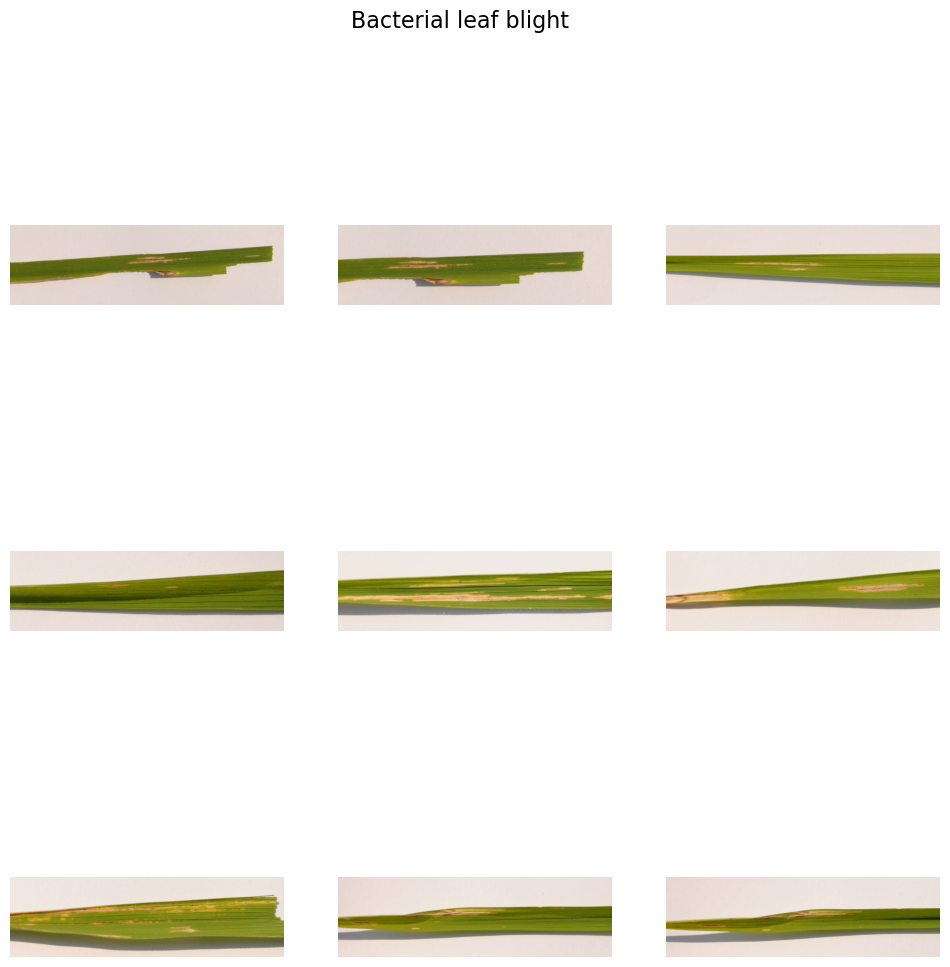

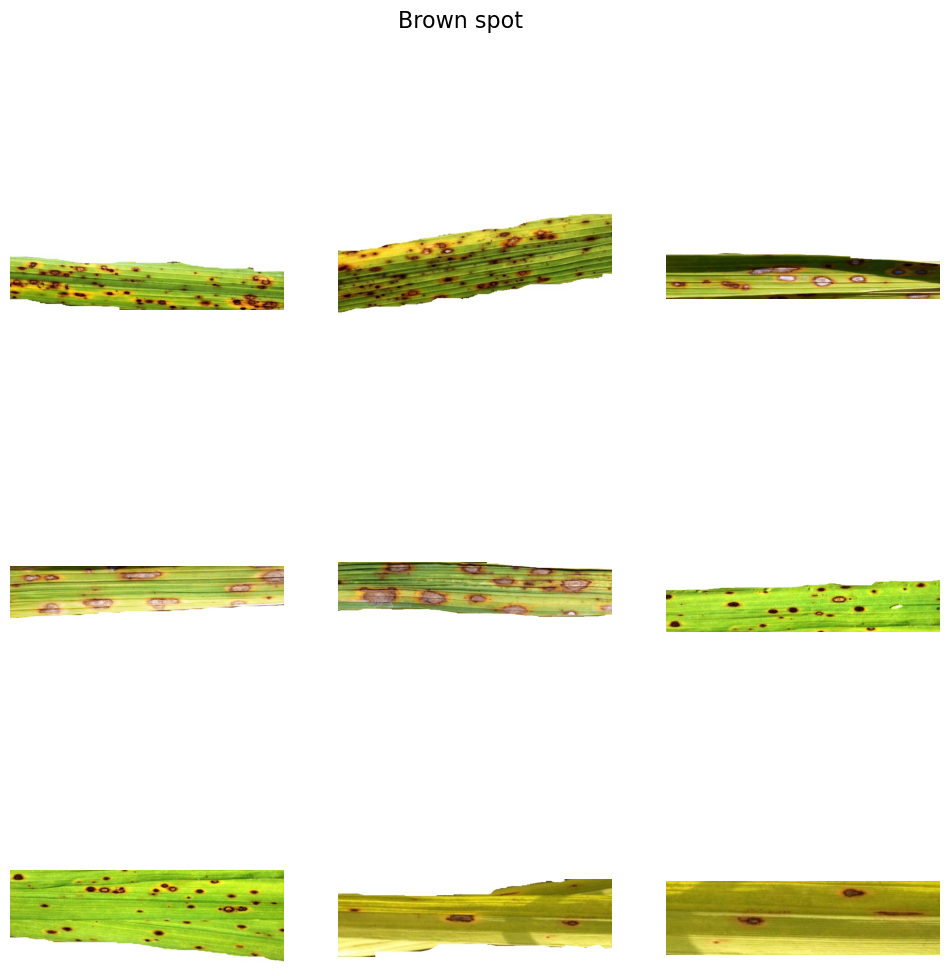

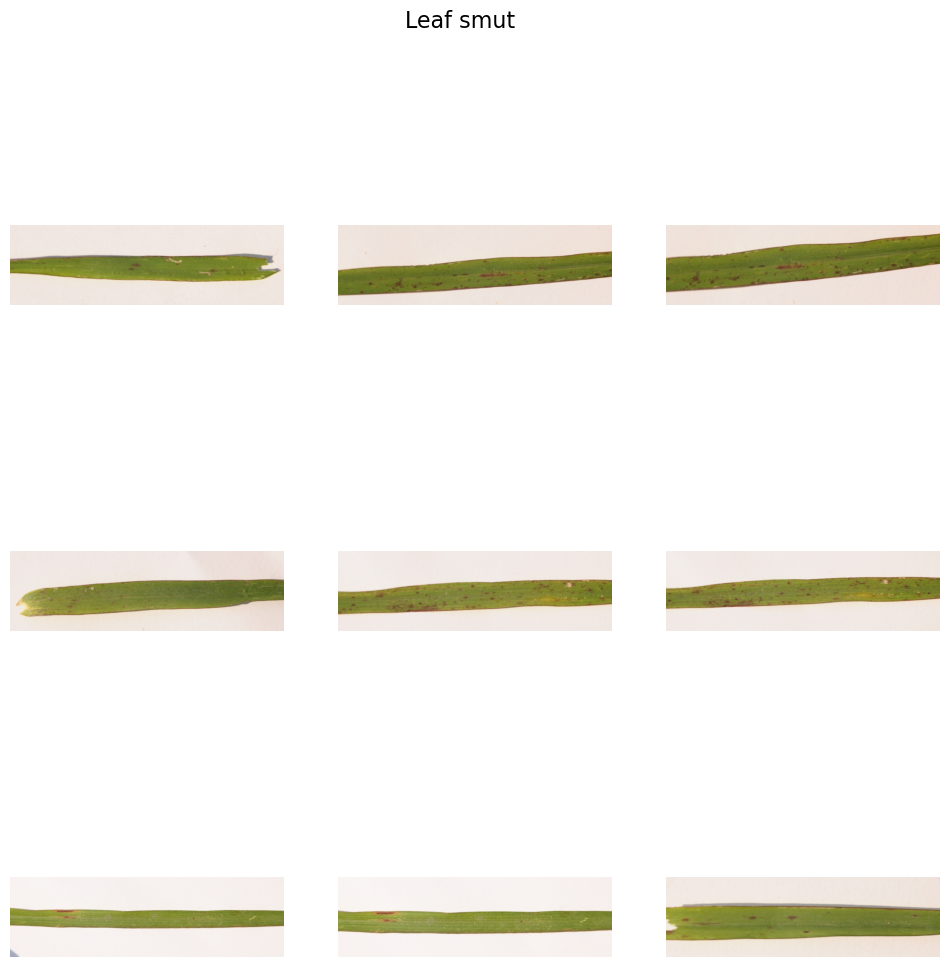

In [44]:
##  Grid of images for each class

def show_grid(cls, n=9):
    class_path = os.path.join(data_dir, cls)
    files = [
        f for f in os.listdir(class_path)
        if f.lower().endswith(image_extensions)
    ][:n]

    plt.figure(figsize=(12,12))
    for i, img_file in enumerate(files):
        img_path = os.path.join(class_path, img_file)
        img = Image.open(img_path)
        plt.subplot(3, 3, i+1)
        plt.imshow(img)
        plt.axis("off")
    plt.suptitle(cls, fontsize=16)
    plt.show()

for cls in class_counts.keys():
    show_grid(cls)


####  Image Grid Visualization - Interpretation

The 3×3 image grids for each class provide a deeper visual understanding of the
dataset. By looking at multiple images together, we can observe:

- **Bacterial Leaf Blight:** yellow streaks, drying patterns, and long lesions.
- **Brown Spot:** brown circular or oval spots scattered across the leaf.
- **Leaf Smut:** dark, blackish or gray fungal patches on the leaf surface.

This visualization helps confirm:
- Images are correctly labeled.
- There is enough variation within each class (lighting, angle, background).
- No obvious anomalies or mislabelled images are present.
- The dataset has good diversity for training a CNN model.

The grid strengthens confidence that the dataset is suitable for building a
multi-class image classification model.


# Preprocessing

### 1. Loading And Resizing Of Images

In [48]:
# Setup
image_extensions = (".jpg", ".jpeg", ".png", ".bmp")
target_size = (224, 224)

X_resized = []
y_labels = []

label_map = {
    "Bacterial leaf blight": 0,
    "Brown spot": 1,
    "Leaf smut": 2
}

class_names = list(label_map.keys())

print("Class mapping:", label_map)
print()


#  Load & Resize

print(" Loading & resizing images...\n")

for class_name in class_names:
    class_path = os.path.join(data_dir, class_name)

    # Safety check
    if not os.path.isdir(class_path):
        print("Missing folder:", class_path)
        continue

    label = label_map[class_name]
    print(f"Processing class: {class_name}  --> label {label}")

    for fname in os.listdir(class_path):
        if fname.lower().endswith(image_extensions):
            img_path = os.path.join(class_path, fname)

            try:
                img = Image.open(img_path).convert("RGB")
                img = img.resize(target_size)

                img_array = np.array(img, dtype=np.float32)
                X_resized.append(img_array)
                y_labels.append(label)

            except Exception as e:
                print("Error reading:", img_path, "|", e)

print("\nFinished resizing images.\n")

X_resized = np.array(X_resized)
y_labels = np.array(y_labels)

print("Resized shape:", X_resized.shape)
print("Unique labels:", np.unique(y_labels))
print()

Class mapping: {'Bacterial leaf blight': 0, 'Brown spot': 1, 'Leaf smut': 2}

 Loading & resizing images...

Processing class: Bacterial leaf blight  --> label 0
Processing class: Brown spot  --> label 1
Processing class: Leaf smut  --> label 2

Finished resizing images.

Resized shape: (119, 224, 224, 3)
Unique labels: [0 1 2]



### 2. Normalising Images Between 0 to 1

In [50]:
print("Normalizing images...\n")

X_normalized = X_resized / 255.0   

print("Normalization complete.")
print("Normalized image array shape:", X_normalized.shape)
print()


Normalizing images...

Normalization complete.
Normalized image array shape: (119, 224, 224, 3)



# Splitting Of Data

- To avoid randomness each time the model cell is runned below code is used

In [53]:
import tensorflow as tf
from tensorflow.keras import layers, models

import random

os.environ['TF_DETERMINISTIC_OPS'] = '1'
os.environ['CUDNN_DETERMINISTIC'] = '1'

random.seed(42)
np.random.seed(42)
tf.random.set_seed(42)

In [54]:
print("Splitting dataset...\n")

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X_normalized,
    y_labels,
    test_size=0.2,      # 80% train, 20% test
    random_state=42,
    shuffle=True
)

print("Split complete!")
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)


Splitting dataset...

Split complete!
X_train: (95, 224, 224, 3)
X_test: (24, 224, 224, 3)
y_train: (95,)
y_test: (24,)


# Models Creation

### CNN Model

In [57]:
import tensorflow as tf
from tensorflow.keras import layers, models

num_classes = 3   # Bacterial leaf blight, Brown spot, Leaf smut


# Define CNN Model

def cnn_model():
    model = models.Sequential([
        
        # 1st Convolution Layer
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
        layers.MaxPooling2D((2, 2)),

        # 2nd Convolution Layer
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        
        # 3rd Convolution Layer
        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),

        # Flatten before dense layers
        layers.Flatten(),

        # Dense layer
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.5),

        # Output layer (3 classes)
        layers.Dense(num_classes, activation='softmax')
    ])

    # Compile model
    model.compile(
        optimizer='adam',
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    
    return model



# Create and summarize model

model = cnn_model()
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 86528)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      11,075,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 3)                   │             387 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,169,347 (42.61 MB)

 Trainable params: 11,169,347 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

### Training The Model

In [59]:
best_model_path = f"best_model.h5"
print("Saving to:", best_model_path)

# Check if previous model exists → delete it
if os.path.exists(best_model_path):
    os.remove(best_model_path)
    print("Deleted old best model file:", best_model_path)
else:
    print("No old best model found. Training fresh model.")


Saving to: best_model.h5
Deleted old best model file: best_model.h5


In [60]:
import tensorflow as tf
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# Creating a Checkpointer
checkpoint = ModelCheckpoint(
    filepath='best_model.h5',        # File to save best model
    monitor='val_accuracy',          # Metric to track
    save_best_only=True,             # Save only when val_accuracy improves
    save_weights_only=False,         # Save full model
    mode='max',                      # Higher accuracy = better
    verbose=1
)

# Optional: Early stopping to prevent overfitting
early_stop = EarlyStopping(
    monitor='val_loss',                     
    patience=5,          # Stop after 5 epochs without improvement
    restore_best_weights=True
)


# Train the CNN model

history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    validation_data=(X_test, y_test),
    callbacks=[checkpoint, early_stop],
    shuffle=True
)
# Evaluate the saved best model

print("\nLoading best saved model...")
best_model = tf.keras.models.load_model('best_model.h5')

print("Evaluating best model:")
best_model.evaluate(X_test, y_test)

Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 832ms/step - accuracy: 0.2703 - loss: 1.3218
Epoch 1: val_accuracy improved from None to 0.29167, saving model to best_model.h5


3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 2s/step - accuracy: 0.3579 - loss: 1.3543 - val_accuracy: 0.2917 - val_loss: 1.2743
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 816ms/step - accuracy: 0.3313 - loss: 1.2575
Epoch 2: val_accuracy improved from 0.29167 to 0.50000, saving model to best_model.h5


3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 2s/step - accuracy: 0.4000 - loss: 1.1710 - val_accuracy: 0.5000 - val_loss: 1.0431
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 831ms/step - accuracy: 0.4703 - loss: 1.0419
Epoch 3: val_accuracy improved from 0.50000 to 0.62500, saving model to best_model.h5


3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 2s/step - accuracy: 0.4421 - loss: 1.0417 - val_accuracy: 0.6250 - val_loss: 0.9556
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 827ms/step - accuracy: 0.4948 - loss: 0.9504
Epoch 4: val_accuracy did not improve from 0.62500
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 1s/step - accuracy: 0.5158 - loss: 0.9448 - val_accuracy: 0.5833 - val_loss: 0.8495
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 810ms/step - accuracy: 0.5541 - loss: 0.8493
Epoch 5: val_accuracy improved from 0.62500 to 0.66667, saving model to best_model.h5


3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 2s/step - accuracy: 0.5684 - loss: 0.8744 - val_accuracy: 0.6667 - val_loss: 0.7378
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 827ms/step - accuracy: 0.7021 - loss: 0.7034
Epoch 6: val_accuracy did not improve from 0.66667
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 955ms/step - accuracy: 0.7158 - loss: 0.7165 - val_accuracy: 0.6250 - val_loss: 0.7089
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 808ms/step - accuracy: 0.6291 - loss: 0.6959
Epoch 7: val_accuracy improved from 0.66667 to 0.75000, saving model to best_model.h5


3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 0.6842 - loss: 0.6914 - val_accuracy: 0.7500 - val_loss: 0.6778
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 820ms/step - accuracy: 0.8065 - loss: 0.5573
Epoch 8: val_accuracy improved from 0.75000 to 0.79167, saving model to best_model.h5


3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 2s/step - accuracy: 0.7789 - loss: 0.5684 - val_accuracy: 0.7917 - val_loss: 0.5680
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 819ms/step - accuracy: 0.7839 - loss: 0.4985
Epoch 9: val_accuracy improved from 0.79167 to 0.87500, saving model to best_model.h5


3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 0.7579 - loss: 0.5283 - val_accuracy: 0.8750 - val_loss: 0.4508
Epoch 10/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 812ms/step - accuracy: 0.7979 - loss: 0.3811
Epoch 10: val_accuracy did not improve from 0.87500
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 919ms/step - accuracy: 0.8000 - loss: 0.3923 - val_accuracy: 0.7917 - val_loss: 0.6456
Epoch 11/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 798ms/step - accuracy: 0.9024 - loss: 0.3167
Epoch 11: val_accuracy did not improve from 0.87500
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 915ms/step - accuracy: 0.8947 - loss: 0.3064 - val_accuracy: 0.7917 - val_loss: 0.7699
Epoch 12/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 812ms/step - accuracy: 0.9320 - loss: 0.2352
Epoch 12: val_accuracy did not improve from 0.87500
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 972ms/step - accuracy: 0.9053 - loss: 0.2709 - val_accuracy: 0.8750 - val_loss: 0.4265
Epoch 13/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 837ms/step - accuracy: 0.9755 - loss: 0.1983
Epoch 13: val_accuracy did not improve from 0.8

Evaluating best model:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 490ms/step - accuracy: 0.8750 - loss: 0.4508


[0.450786828994751, 0.875]

### Loading The Model With Best Validation Accuracy

In [62]:
import tensorflow as tf

# Load saved best model
best_model = tf.keras.models.load_model('best_model.h5')

# Evaluate on training data
train_loss, train_accuracy = best_model.evaluate(
    X_train, y_train, verbose=0
)

# Evaluate on test data
test_loss, test_accuracy = best_model.evaluate(
    X_test, y_test, verbose=0
)

print(f"Training Loss : {train_loss:.4f}")
print(f"Training Accuracy : {train_accuracy:.4f}")

print(f"Test Loss : {test_loss:.4f}")
print(f"Test Accuracy : {test_accuracy:.4f}")


Training Loss : 0.3547
Training Accuracy : 0.8842
Test Loss : 0.4508
Test Accuracy : 0.8750


### Model Accuracy and loss Evaluation

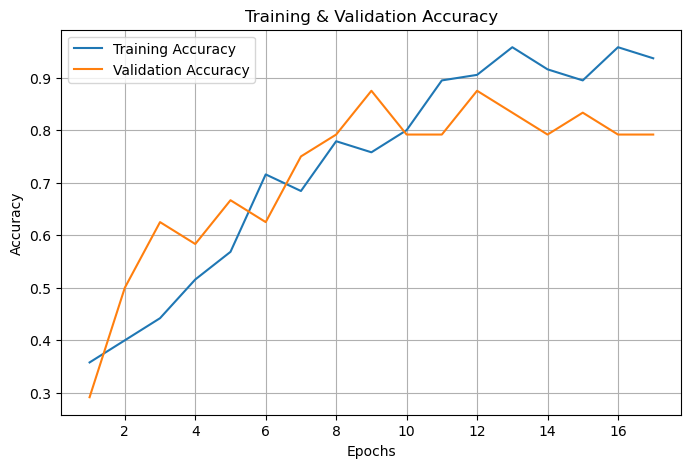

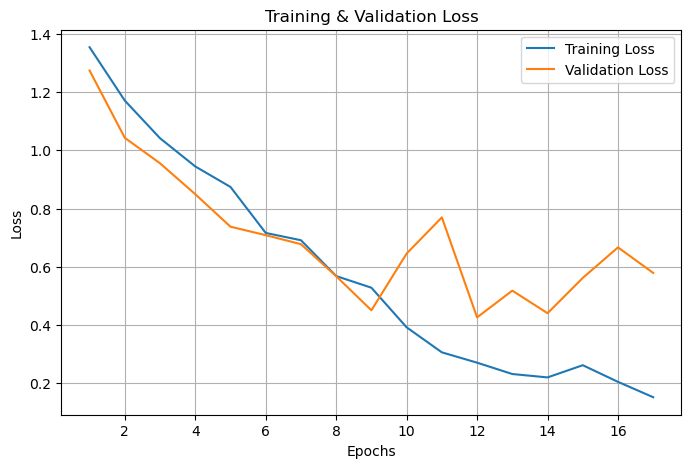

In [64]:
import matplotlib.pyplot as plt

# Extract values
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)


# Plot Accuracy

plt.figure(figsize=(8,5))
plt.plot(epochs, acc, label='Training Accuracy')
plt.plot(epochs, val_acc, label='Validation Accuracy')
plt.title("Training & Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()


# Plot Loss

plt.figure(figsize=(8,5))
plt.plot(epochs, loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.title("Training & Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()

## Checks For Overfitting

In [66]:
loss_gap = test_loss - train_loss
acc_gap = train_accuracy - test_accuracy

print(f"\nLoss Gap (Test − Train): {loss_gap:.4f}")
print(f"Accuracy Gap (Train − Test): {acc_gap:.4f}")

if acc_gap > 0.15 and loss_gap > 0.5:
    print("Significant Overfitting detected")
elif acc_gap > 0.05 and loss_gap > 0.1:
    print("Minimal Overfitting detected")
else:
    print("No Overfitting (Good Generalization)")



Loss Gap (Test − Train): 0.0961
Accuracy Gap (Train − Test): 0.0092
No Overfitting (Good Generalization)


## Classification Report And Confusion Matrix

In [68]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

best_model = tf.keras.models.load_model('best_model.h5')

y_pred_probs = best_model.predict(X_test)

# Convert probabilities to class labels
y_pred = np.argmax(y_pred_probs, axis=1)

class_names = [
    "Bacterial leaf blight",
    "Brown spot",
    "Leaf smut"
]
print("\nClassification Report:\n")
print(classification_report(
    y_test,
    y_pred,
    target_names=class_names
))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 273ms/step

Classification Report:

                       precision    recall  f1-score   support

Bacterial leaf blight       0.88      1.00      0.93         7
           Brown spot       0.86      0.75      0.80         8
            Leaf smut       0.89      0.89      0.89         9

             accuracy                           0.88        24
            macro avg       0.87      0.88      0.87        24
         weighted avg       0.87      0.88      0.87        24



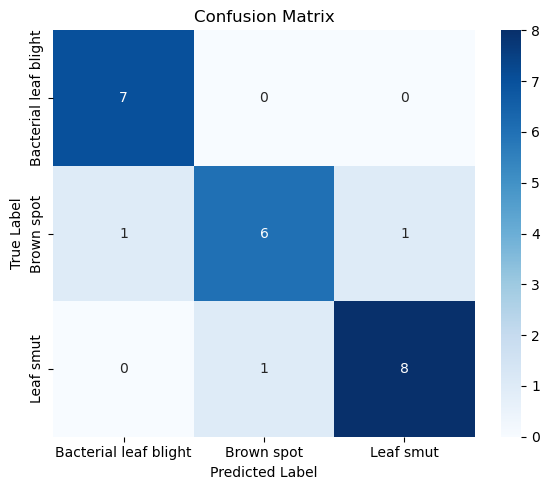

In [69]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=class_names,
    yticklabels=class_names
)

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()


### Observations Of CNN Model

- Data Augmentation has not been used for CNN model as it is dropping the accuracy to 41%
- Hence,Instead of Data generator Train And Test Split is used
- CNN Model achieved a good accuracy of 87%
- There is no overfitting detected and the model has been generalised well
- Model took less time for training as it took around 16-20 epochs
- Classfication report and confusion matrix shows that model has classified Bacterial leaf blight and leaf smut very well


## MobileNetV2 Model

In [73]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

img_size = 224
batch_size = 8

datagen = ImageDataGenerator(
    rescale=1/255,
    validation_split=0.20,        # 80% train, 20% validation
    rotation_range=30,
    width_shift_range=0.25,
    height_shift_range=0.25,
    zoom_range=0.35,
    shear_range=0.20,
    horizontal_flip=True,
    brightness_range=[0.6, 1.4]
)

train_gen = datagen.flow_from_directory(
    "Data",
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

val_gen = datagen.flow_from_directory(
    "Data",
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)


Found 96 images belonging to 3 classes.
Found 23 images belonging to 3 classes.


### Model Creation

In [75]:
base_model = tf.keras.applications.MobileNetV2(
    input_shape=(img_size, img_size, 3),
    include_top=False,
    weights='imagenet'
)

base_model.trainable = False   # freeze feature extractor
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.4)(x)
output = Dense(3, activation='softmax')(x)

model1 = Model(inputs=base_model.input, outputs=output)

model1.compile(
    optimizer=Adam(0.0005),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model1.summary()


Model: "functional_31"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)    │ (None, 224, 224, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Conv1 (Conv2D)                │ (None, 112, 112, 32)      │             864 │ input_layer_1[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ bn_Conv1 (BatchNormalization) │ (None, 112, 112, 32)      │             128 │ Conv1[0][0]                │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Conv1_relu (ReLU)             │ (None, 112, 112, 32)      │               0 │ bn_Conv1[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_depthwise       │ (None, 112, 112, 32)      │             288 │ Conv1_relu[0][0]           │
│ (DepthwiseConv2D)             │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_depthwise_BN    │ (None, 112, 112, 32)      │             128 │ expanded_conv_depthwise[0… │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_depthwise_relu  │ (None, 112, 112, 32)      │               0 │ expanded_conv_depthwise_B… │
│ (ReLU)                        │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_project         │ (None, 112, 112, 16)      │             512 │ expanded_conv_depthwise_r… │
│ (Conv2D)                      │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_project_BN      │ (None, 112, 112, 16)      │              64 │ expanded_conv_project[0][… │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_expand (Conv2D)       │ (None, 112, 112, 96)      │           1,536 │ expanded_conv_project_BN[… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_expand_BN             │ (None, 112, 112, 96)      │             384 │ block_1_expand[0][0]       │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_expand_relu (ReLU)    │ (None, 112, 112, 96)      │               0 │ block_1_expand_BN[0][0]    │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_pad (ZeroPadding2D)   │ (None, 113, 113, 96)      │               0 │ block_1_expand_relu[0][0]  │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_depthwise             │ (None, 56, 56, 96)        │             864 │ block_1_pad[0][0]          │
│ (DepthwiseConv2D)             │                           │               

 Total params: 2,261,827 (8.63 MB)

 Trainable params: 3,843 (15.01 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

### Training The Model

In [77]:
best_model_path = f"MobileNetV2_model.h5"
print("Saving to:", best_model_path)

# Check if previous model exists → delete it
if os.path.exists(best_model_path):
    os.remove(best_model_path)
    print("Deleted old best model file:", best_model_path)
else:
    print("No old best model found. Training fresh model.")


Saving to: MobileNetV2_model.h5
Deleted old best model file: MobileNetV2_model.h5


In [78]:
checkpoint = ModelCheckpoint(
    filepath='MobileNetV2_model.h5',        
    monitor='val_accuracy',          
    save_best_only=True,            
    save_weights_only=False,        
    mode='max',                      
    verbose=1
)
callbacks = [
    tf.keras.callbacks.EarlyStopping(
        monitor='val_loss',
        patience=8,
        restore_best_weights=True
    ),
    tf.keras.callbacks.ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.3,
        patience=4
    )
]

history1 = model1.fit(
    train_gen,
    validation_data=val_gen,
    epochs=50,
    callbacks=(checkpoint,callbacks)
)
print("\nLoading best saved model...")
best_model1 = tf.keras.models.load_model('MobileNetV2_model.h5')

print("Evaluating best model:")

loss1, accuracy1 = best_model1.evaluate(val_gen)

print("Validation Loss:", loss1)
print("Validation Accuracy:", accuracy1)

Epoch 1/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 436ms/step - accuracy: 0.4417 - loss: 1.4002
Epoch 1: val_accuracy improved from None to 0.69565, saving model to MobileNetV2_model.h5


12/12 ━━━━━━━━━━━━━━━━━━━━ 12s 736ms/step - accuracy: 0.4688 - loss: 1.3045 - val_accuracy: 0.6957 - val_loss: 0.6457 - learning_rate: 5.0000e-04
Epoch 2/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 500ms/step - accuracy: 0.4024 - loss: 1.1891
Epoch 2: val_accuracy improved from 0.69565 to 0.73913, saving model to MobileNetV2_model.h5


12/12 ━━━━━━━━━━━━━━━━━━━━ 10s 708ms/step - accuracy: 0.4167 - loss: 1.1744 - val_accuracy: 0.7391 - val_loss: 0.6157 - learning_rate: 5.0000e-04
Epoch 3/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 447ms/step - accuracy: 0.4734 - loss: 1.1421
Epoch 3: val_accuracy improved from 0.73913 to 0.78261, saving model to MobileNetV2_model.h5


12/12 ━━━━━━━━━━━━━━━━━━━━ 9s 637ms/step - accuracy: 0.5000 - loss: 1.1462 - val_accuracy: 0.7826 - val_loss: 0.5828 - learning_rate: 5.0000e-04
Epoch 4/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 472ms/step - accuracy: 0.4310 - loss: 1.1920
Epoch 4: val_accuracy improved from 0.78261 to 0.86957, saving model to MobileNetV2_model.h5


12/12 ━━━━━━━━━━━━━━━━━━━━ 11s 724ms/step - accuracy: 0.4479 - loss: 1.1665 - val_accuracy: 0.8696 - val_loss: 0.5923 - learning_rate: 5.0000e-04
Epoch 5/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 495ms/step - accuracy: 0.5655 - loss: 0.9903
Epoch 5: val_accuracy did not improve from 0.86957
12/12 ━━━━━━━━━━━━━━━━━━━━ 7s 619ms/step - accuracy: 0.5938 - loss: 0.8779 - val_accuracy: 0.6522 - val_loss: 0.6982 - learning_rate: 5.0000e-04
Epoch 6/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 439ms/step - accuracy: 0.6555 - loss: 0.8311
Epoch 6: val_accuracy did not improve from 0.86957
12/12 ━━━━━━━━━━━━━━━━━━━━ 9s 552ms/step - accuracy: 0.6146 - loss: 0.8986 - val_accuracy: 0.7391 - val_loss: 0.5875 - learning_rate: 5.0000e-04
Epoch 7/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 447ms/step - accuracy: 0.5609 - loss: 1.0047
Epoch 7: val_accuracy did not improve from 0.86957
12/12 ━━━━━━━━━━━━━━━━━━━━ 7s 570ms/step - accuracy: 0.5625 - loss: 0.9215 - val_accuracy: 0.7826 - val_loss: 0.5269 - learning_rate: 5.0000e-04
Epoch 8/

12/12 ━━━━━━━━━━━━━━━━━━━━ 13s 952ms/step - accuracy: 0.8438 - loss: 0.4296 - val_accuracy: 0.9130 - val_loss: 0.3924 - learning_rate: 1.5000e-04
Epoch 19/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 647ms/step - accuracy: 0.8476 - loss: 0.3988
Epoch 19: val_accuracy did not improve from 0.91304
12/12 ━━━━━━━━━━━━━━━━━━━━ 9s 778ms/step - accuracy: 0.8229 - loss: 0.4387 - val_accuracy: 0.9130 - val_loss: 0.3059 - learning_rate: 1.5000e-04
Epoch 20/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 500ms/step - accuracy: 0.7720 - loss: 0.5265
Epoch 20: val_accuracy did not improve from 0.91304
12/12 ━━━━━━━━━━━━━━━━━━━━ 7s 617ms/step - accuracy: 0.7917 - loss: 0.5291 - val_accuracy: 0.8696 - val_loss: 0.4205 - learning_rate: 1.5000e-04
Epoch 21/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 442ms/step - accuracy: 0.9164 - loss: 0.3164
Epoch 21: val_accuracy did not improve from 0.91304
12/12 ━━━━━━━━━━━━━━━━━━━━ 7s 554ms/step - accuracy: 0.8958 - loss: 0.3279 - val_accuracy: 0.9130 - val_loss: 0.3947 - learning_rate: 1.5000e-04
Ep

Evaluating best model:
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 456ms/step - accuracy: 0.9130 - loss: 0.3457
Validation Loss: 0.3456588685512543
Validation Accuracy: 0.9130434989929199


### Model Accuracy And Loss Evaluation

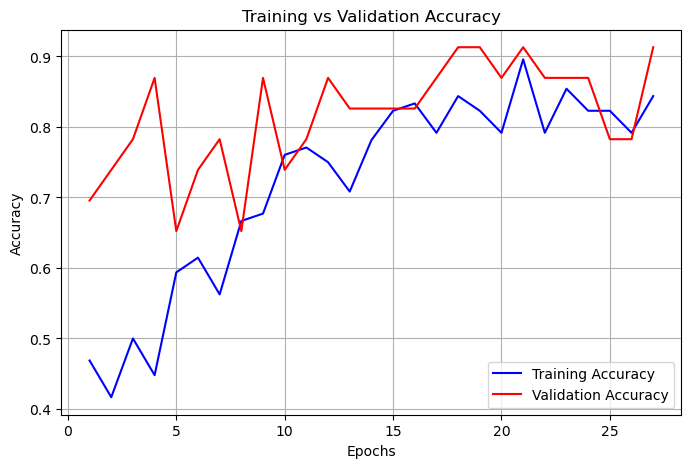

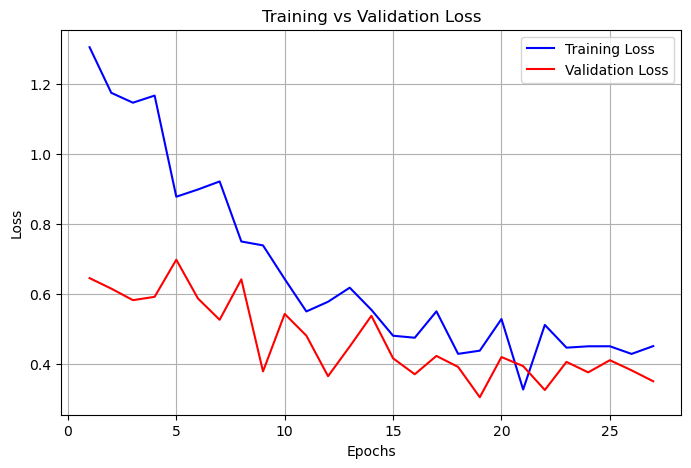

In [80]:
import matplotlib.pyplot as plt

acc1 = history1.history['accuracy']
val_acc1 = history1.history['val_accuracy']

loss1 = history1.history['loss']
val_loss1 = history1.history['val_loss']

epochs1 = range(1, len(acc1) + 1)


# Plot Accuracy

plt.figure(figsize=(8,5))
plt.plot(epochs1, acc1, 'b-', label='Training Accuracy')
plt.plot(epochs1, val_acc1, 'r-', label='Validation Accuracy')
plt.title("Training vs Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()


# Plot Loss

plt.figure(figsize=(8,5))
plt.plot(epochs1, loss1, 'b-', label='Training Loss')
plt.plot(epochs1, val_loss1, 'r-', label='Validation Loss')
plt.title("Training vs Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()


### Checks For Overfitting

In [82]:
train_acc1 = history1.history['accuracy'][-1]
val_acc1 = history1.history['val_accuracy'][-1]

train_loss1 = history1.history['loss'][-1]
val_loss1 = history1.history['val_loss'][-1]

print("Train Accuracy:", train_acc1)
print("Validation Accuracy:", val_acc1)
print("Train Loss:", train_loss1)
print("Validation Loss:", val_loss1)

if train_acc1 - val_acc1 > 0.10:
    print("Model has significant overfitting")
elif train_loss1 - val_loss1 > 0.05:
    print("Model has moderater overfitting")
else:
    print("No major overfitting detected")


Train Accuracy: 0.84375
Validation Accuracy: 0.9130434989929199
Train Loss: 0.45174744725227356
Validation Loss: 0.35143691301345825
Model has moderater overfitting


### Classification Report And Confusion Matrix

In [84]:
best_model1 = tf.keras.models.load_model('MobileNetV2_model.h5')

# True labels from validation generator
y_true = val_gen.classes

# Class names (folder names)
class_names = list(val_gen.class_indices.keys())

print("Class Names:", class_names)

# Predict probabilities
y_pred_probs = best_model1.predict(val_gen)

# Convert probabilities to class labels
y_pred = np.argmax(y_pred_probs, axis=1)

print("\nClassification Report:\n")
print(classification_report(
    y_true,
    y_pred,
    target_names=class_names
))


Class Names: ['Bacterial leaf blight', 'Brown spot', 'Leaf smut']
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 956ms/step

Classification Report:

                       precision    recall  f1-score   support

Bacterial leaf blight       1.00      1.00      1.00         8
           Brown spot       0.88      0.88      0.88         8
            Leaf smut       0.86      0.86      0.86         7

             accuracy                           0.91        23
            macro avg       0.91      0.91      0.91        23
         weighted avg       0.91      0.91      0.91        23



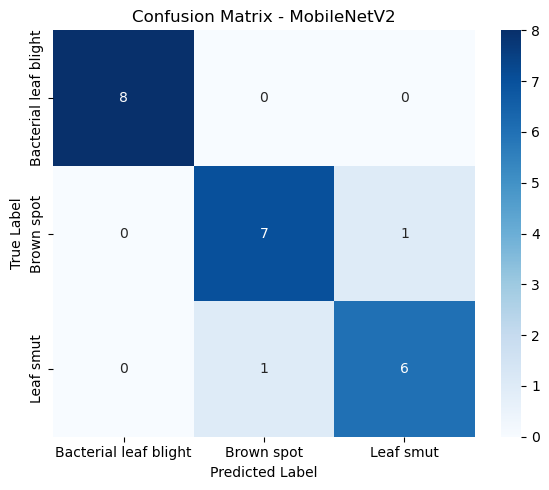

In [85]:
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=class_names,
    yticklabels=class_names
)

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - MobileNetV2")
plt.tight_layout()
plt.show()


### Observations Of Mobile Net Model

- MobileNetV2 Model has achieved a good validation accuracy of 91% and Training accuracy of 84%
- Model has took large time for time training of the model around 25-30 epochs
- There is a moderate overfitting. Hence, we cannot say that this model is best performing among all.
- Classification report states that model has performed well in classifing Bactriel leaf blight, brown spot and leaf smut

## VGG 16 Model

In [89]:
base_model2 = tf.keras.applications.VGG16(
    input_shape=(img_size, img_size, 3),
    include_top=False,
    weights='imagenet'
)

base_model2.trainable = False   # Freeze convolutional layers

x = base_model2.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(num_classes, activation='softmax')(x)

model2 = Model(inputs=base_model2.input, outputs=output)

# Compiling model
model2.compile(
    optimizer=Adam(learning_rate=0.0005),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model2.summary()


Model: "functional_32"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_1           │ (None, 512)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 256)                 │         131,3

 Total params: 14,846,787 (56.64 MB)

 Trainable params: 132,099 (516.01 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

### Training Model

In [91]:
best_model_path = f"VGG16_model.h5"
print("Saving to:", best_model_path)

# Check if previous model exists → delete it
if os.path.exists(best_model_path):
    os.remove(best_model_path)
    print("Deleted old best model file:", best_model_path)
else:
    print("No old best model found. Training fresh model.")


Saving to: VGG16_model.h5
Deleted old best model file: VGG16_model.h5


In [92]:
checkpoint = ModelCheckpoint(
    filepath='VGG16_model.h5',
    monitor='val_accuracy',
    save_best_only=True,
    save_weights_only=False,
    mode='max',
    verbose=1
)

callbacks = [
    EarlyStopping(
        monitor='val_loss',
        patience=8,
        restore_best_weights=True
    ),
    ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.3,
        patience=4
    )
]

history2 = model2.fit(
    train_gen,
    validation_data=val_gen,
    epochs=50,
    callbacks=(checkpoint,callbacks)
)

print("\nLoading best saved VGG16 model...")
best_vgg16 = tf.keras.models.load_model('VGG16_model.h5')

loss2, accuracy2 = best_vgg16.evaluate(val_gen)

print("Validation Loss:", loss2)
print("Validation Accuracy:", accuracy2)


Epoch 1/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.2324 - loss: 1.2626
Epoch 1: val_accuracy improved from None to 0.39130, saving model to VGG16_model.h5


12/12 ━━━━━━━━━━━━━━━━━━━━ 28s 2s/step - accuracy: 0.2396 - loss: 1.2456 - val_accuracy: 0.3913 - val_loss: 1.1112 - learning_rate: 5.0000e-04
Epoch 2/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.4041 - loss: 1.1892
Epoch 2: val_accuracy did not improve from 0.39130
12/12 ━━━━━━━━━━━━━━━━━━━━ 27s 2s/step - accuracy: 0.4688 - loss: 1.1081 - val_accuracy: 0.3478 - val_loss: 1.0858 - learning_rate: 5.0000e-04
Epoch 3/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.3500 - loss: 1.1599
Epoch 3: val_accuracy improved from 0.39130 to 0.47826, saving model to VGG16_model.h5


12/12 ━━━━━━━━━━━━━━━━━━━━ 29s 2s/step - accuracy: 0.3750 - loss: 1.1526 - val_accuracy: 0.4783 - val_loss: 1.0409 - learning_rate: 5.0000e-04
Epoch 4/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.4188 - loss: 1.1521
Epoch 4: val_accuracy improved from 0.47826 to 0.56522, saving model to VGG16_model.h5


12/12 ━━━━━━━━━━━━━━━━━━━━ 27s 2s/step - accuracy: 0.4271 - loss: 1.1206 - val_accuracy: 0.5652 - val_loss: 1.0333 - learning_rate: 5.0000e-04
Epoch 5/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.5375 - loss: 0.9264
Epoch 5: val_accuracy did not improve from 0.56522
12/12 ━━━━━━━━━━━━━━━━━━━━ 40s 2s/step - accuracy: 0.4583 - loss: 1.0125 - val_accuracy: 0.5652 - val_loss: 1.0218 - learning_rate: 5.0000e-04
Epoch 6/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.5040 - loss: 1.0803
Epoch 6: val_accuracy did not improve from 0.56522
12/12 ━━━━━━━━━━━━━━━━━━━━ 25s 2s/step - accuracy: 0.4688 - loss: 1.0729 - val_accuracy: 0.4783 - val_loss: 1.0116 - learning_rate: 5.0000e-04
Epoch 7/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.4954 - loss: 0.9990
Epoch 7: val_accuracy improved from 0.56522 to 0.69565, saving model to VGG16_model.h5


12/12 ━━━━━━━━━━━━━━━━━━━━ 27s 2s/step - accuracy: 0.4896 - loss: 1.0010 - val_accuracy: 0.6957 - val_loss: 0.9925 - learning_rate: 5.0000e-04
Epoch 8/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.5819 - loss: 0.9592
Epoch 8: val_accuracy did not improve from 0.69565
12/12 ━━━━━━━━━━━━━━━━━━━━ 26s 2s/step - accuracy: 0.5417 - loss: 0.9770 - val_accuracy: 0.5217 - val_loss: 0.9768 - learning_rate: 5.0000e-04
Epoch 9/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.4930 - loss: 0.9894
Epoch 9: val_accuracy did not improve from 0.69565
12/12 ━━━━━━━━━━━━━━━━━━━━ 26s 2s/step - accuracy: 0.5417 - loss: 0.9345 - val_accuracy: 0.4348 - val_loss: 0.9757 - learning_rate: 5.0000e-04
Epoch 10/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.5915 - loss: 0.8764
Epoch 10: val_accuracy did not improve from 0.69565
12/12 ━━━━━━━━━━━━━━━━━━━━ 26s 2s/step - accuracy: 0.5312 - loss: 0.9503 - val_accuracy: 0.6522 - val_loss: 0.9306 - learning_rate: 5.0000e-04
Epoch 11/50
12/12 ━━━━━━

12/12 ━━━━━━━━━━━━━━━━━━━━ 27s 2s/step - accuracy: 0.6875 - loss: 0.8292 - val_accuracy: 0.7391 - val_loss: 0.8490 - learning_rate: 5.0000e-04
Epoch 16/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.6488 - loss: 0.8113
Epoch 16: val_accuracy did not improve from 0.73913
12/12 ━━━━━━━━━━━━━━━━━━━━ 26s 2s/step - accuracy: 0.5938 - loss: 0.8511 - val_accuracy: 0.7391 - val_loss: 0.7819 - learning_rate: 5.0000e-04
Epoch 17/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.6747 - loss: 0.7692
Epoch 17: val_accuracy did not improve from 0.73913
12/12 ━━━━━━━━━━━━━━━━━━━━ 40s 2s/step - accuracy: 0.7083 - loss: 0.7498 - val_accuracy: 0.5652 - val_loss: 0.8602 - learning_rate: 5.0000e-04
Epoch 18/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.6760 - loss: 0.8371
Epoch 18: val_accuracy did not improve from 0.73913
12/12 ━━━━━━━━━━━━━━━━━━━━ 25s 2s/step - accuracy: 0.6562 - loss: 0.8382 - val_accuracy: 0.6957 - val_loss: 0.7996 - learning_rate: 5.0000e-04
Epoch 19/50
12/12 ━━

12/12 ━━━━━━━━━━━━━━━━━━━━ 26s 2s/step - accuracy: 0.7188 - loss: 0.7349 - val_accuracy: 0.7826 - val_loss: 0.7907 - learning_rate: 5.0000e-04
Epoch 20/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.6506 - loss: 0.8255
Epoch 20: val_accuracy did not improve from 0.78261
12/12 ━━━━━━━━━━━━━━━━━━━━ 25s 2s/step - accuracy: 0.6875 - loss: 0.8142 - val_accuracy: 0.6957 - val_loss: 0.8193 - learning_rate: 5.0000e-04
Epoch 21/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.6888 - loss: 0.7459
Epoch 21: val_accuracy did not improve from 0.78261
12/12 ━━━━━━━━━━━━━━━━━━━━ 26s 2s/step - accuracy: 0.6979 - loss: 0.7506 - val_accuracy: 0.6957 - val_loss: 0.7811 - learning_rate: 1.5000e-04
Epoch 22/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.6824 - loss: 0.7650
Epoch 22: val_accuracy did not improve from 0.78261
12/12 ━━━━━━━━━━━━━━━━━━━━ 25s 2s/step - accuracy: 0.6771 - loss: 0.7687 - val_accuracy: 0.6957 - val_loss: 0.7860 - learning_rate: 1.5000e-04
Epoch 23/50
12/12 ━━

3/3 ━━━━━━━━━━━━━━━━━━━━ 14s 4s/step - accuracy: 0.7826 - loss: 0.7457
Validation Loss: 0.7456872463226318
Validation Accuracy: 0.782608687877655


### Model Accuracy And Loss Evaluation

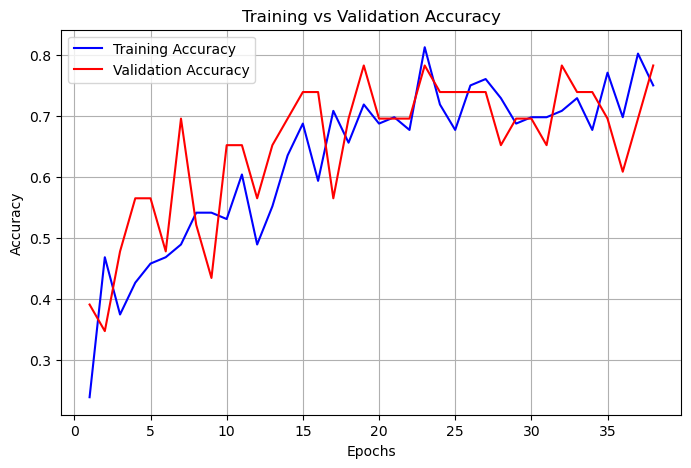

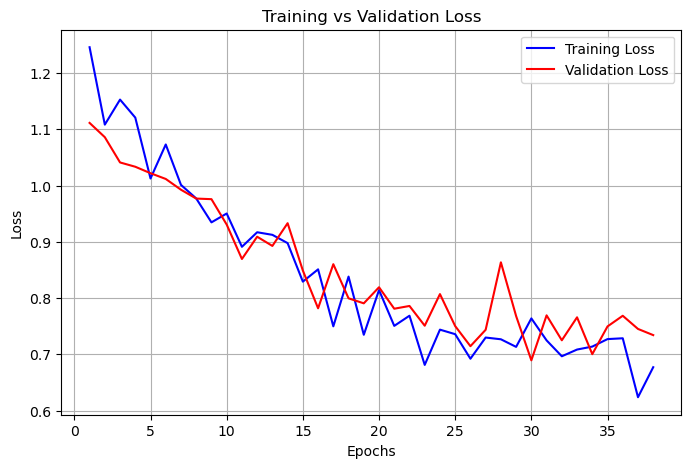

In [94]:
import matplotlib.pyplot as plt

acc2 = history2.history['accuracy']
val_acc2 = history2.history['val_accuracy']

loss2 = history2.history['loss']
val_loss2 = history2.history['val_loss']

epochs2 = range(1, len(acc2) + 1)


# Plot Accuracy

plt.figure(figsize=(8,5))
plt.plot(epochs2, acc2, 'b-', label='Training Accuracy')
plt.plot(epochs2, val_acc2, 'r-', label='Validation Accuracy')
plt.title("Training vs Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()


# Plot Loss

plt.figure(figsize=(8,5))
plt.plot(epochs2, loss2, 'b-', label='Training Loss')
plt.plot(epochs2, val_loss2, 'r-', label='Validation Loss')
plt.title("Training vs Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()


### Checks For Overfitting 

In [96]:
train_acc2 = history2.history['accuracy'][-1]
val_acc2 = history2.history['val_accuracy'][-1]

train_loss2 = history2.history['loss'][-1]
val_loss2 = history2.history['val_loss'][-1]

print("Train Accuracy:", train_acc2)
print("Validation Accuracy:", val_acc2)
print("Train Loss:", train_loss2)
print("Validation Loss:", val_loss2)

if train_acc2 - val_acc2 > 0.10:
    print("Model has significant overfitting")
elif train_loss2 - val_loss2 > 0.05:
    print("Model has moderater overfitting")
else:
    print("No major overfitting detected")


Train Accuracy: 0.75
Validation Accuracy: 0.782608687877655
Train Loss: 0.6772316098213196
Validation Loss: 0.7342431545257568
No major overfitting detected


### Classification Report And Confusion Matrix

In [98]:
best_vgg16 = tf.keras.models.load_model('VGG16_model.h5')

# Ground truth labels (order is preserved because shuffle=False)
y_true = val_gen.classes

# Class names from directory structure
class_names = list(val_gen.class_indices.keys())

print("Class Names:", class_names)

# Predict probabilities
y_pred_probs = best_vgg16.predict(val_gen)

# Convert to predicted class indices
y_pred = np.argmax(y_pred_probs, axis=1)

print("\nClassification Report (VGG16):\n")
print(classification_report(
    y_true,
    y_pred,
    target_names=class_names
))


Class Names: ['Bacterial leaf blight', 'Brown spot', 'Leaf smut']
2/3 ━━━━━━━━━━━━━━━━━━━━ 3s 4s/step WARNING:tensorflow:5 out of the last 7 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x0000021CD652A520> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.


3/3 ━━━━━━━━━━━━━━━━━━━━ 15s 5s/step

Classification Report (VGG16):

                       precision    recall  f1-score   support

Bacterial leaf blight       0.89      1.00      0.94         8
           Brown spot       1.00      0.62      0.77         8
            Leaf smut       0.67      0.86      0.75         7

             accuracy                           0.83        23
            macro avg       0.85      0.83      0.82        23
         weighted avg       0.86      0.83      0.82        23



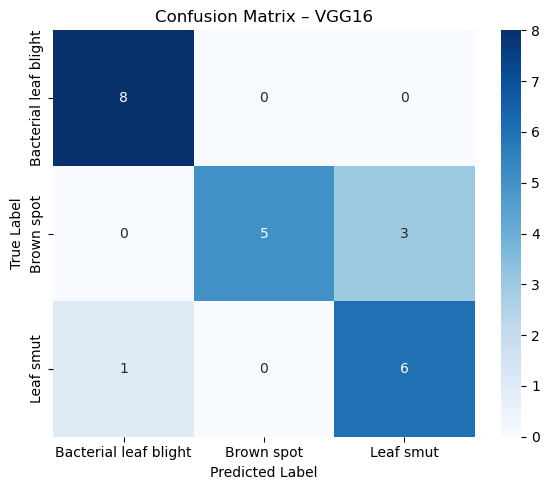

In [99]:
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=class_names,
    yticklabels=class_names
)

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix – VGG16")
plt.tight_layout()
plt.show()


### Observations Of VGG16 Model

- Model has achieved Not great but a good validation accuracy of 78% and 75% of training accuracy
- Model took much time for training, around 40 epochs
- Classification report states that model classified very well for bacterial leaf blight , but was not that good in classifing brown spot and leaf smut
- Model has been very well generalised and no overfitting has been detected from the perfrormance

## Models Comparision & Final Recommendation

In [103]:
import numpy as np
import pandas as pd
result=pd.DataFrame({
    'Models' : ['CNN Model', 'MobileNetV2 Model' , 'VGG16 Model'],
    'Validation Accuracy' : [test_accuracy, val_acc1, val_acc2],
    'Training Accuracy' : [train_accuracy, train_acc1, train_acc2],
    'No Of Epochs Used For Training' : [17,27,38]
})
display(result)

,Models,Validation Accuracy,Training Accuracy,No Of Epochs Used For Training
0,CNN Model,0.875000,0.884211,17
1,MobileNetV2 Model,0.913043,0.843750,27
2,VGG16 Model,0.782609,0.750000,38


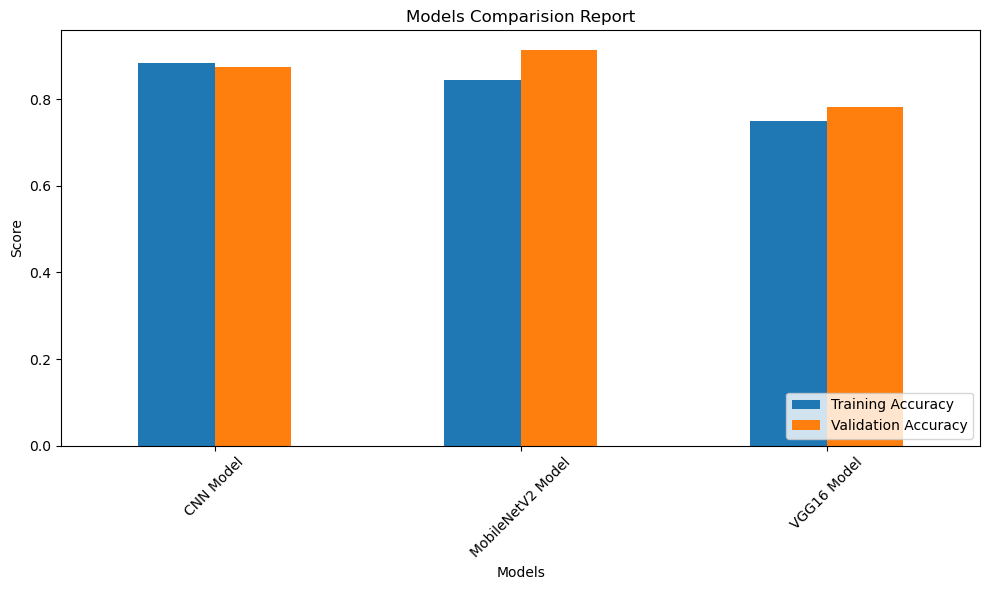

In [104]:
metrics = ['Training Accuracy', 'Validation Accuracy']
result.set_index('Models')[metrics].plot(kind='bar', figsize=(10, 6))
plt.title('Models Comparision Report')
plt.ylabel('Score')
plt.xticks(rotation=45 )
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()
          

# Final Conclusion

In this project, a Convolutional Neural Network (CNN)–based approach was successfully implemented to detect and classify rice leaf diseases using image data. The model was trained and evaluated on multiple architectures and configurations, allowing a comprehensive comparison of performance across different setups. Based on the experimental results, the selected CNN model demonstrated strong classification capability, achieving high accuracy and a better classification report compared to other tested models.

The results confirm that deep learning techniques, particularly CNNs, are highly effective for automated plant disease detection, reducing the need for manual inspection and expert intervention. Despite challenges such as image quality variation, dataset imbalance, and limited data availability, the model was able to learn meaningful features and generalize well on unseen data.

Overall, this system has the potential to assist farmers and agricultural experts in early disease identification, which can help improve crop yield and reduce losses. With further improvements—such as larger datasets, data augmentation, and real-time deployment—this approach can be extended into a practical and scalable solution for precision agriculture.
- **Best Model:**:

From all above observations, we can say that CNN Model is the best model compared to all other models with 87% validation accuracy and 88% training accuracy and its metrics are better than other models, though MobileNetV2 has validation accuracy 91% with the training accuracy 87% and the model shows a moderate overfitting.So, we Prefered CNN as the best among all



## Challenges Faced while making this project

### Imaged Dataset Quality & Imbalance

- Images of different classes were of different sizes that was need to handled
- The wide variety of aspect ratios means resizing may introduce slight distortion, but this was handled with data augmentation (rotation, zoom, shift)
- The dataset is not standardized in terms of resolution, that has been fixed with normalisation

### Models Creation & Training 

- It has been observed that the accuracy of the models has been changing each time the cell is runned. To handle this Random Seed (42) was used
- It has been observed that models are trying to memorize the dataset as the dataset is small, which has been handled using data augmentation technique
-  Balancing accuracy with computational efficiency is challenging.
- Deep learning models were overfit as the dataset is small is was challenging to choose the correct parameters to minimize overfitting.


### Evaluation Metrics

- Accuracy alone is misleading the performance of the model. You need to balance precision, recall, F1-score and no of epochs used to capture the real predictive power.

